<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/models/With_MF_ML_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install RDKit
!pip install rdkit

# Library imports
from pathlib import Path
from warnings import filterwarnings
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# RDKit
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# Scikit-learn
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import (
    auc, accuracy_score, recall_score, roc_curve, roc_auc_score, RocCurveDisplay
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
)
from sklearn.base import BaseEstimator, TransformerMixin

# Google Drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Landrum_Phenol_training_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Landrum_Phenol_test_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Landrum_All_test_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Landrum_All_training_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Minimal_Phenol_training_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Minimal_Phenol_test_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Minimal_All_test_data.csv
!wget --timestamping https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master//data_extraction%2Bcuration/Minimal_All_training_data.csv


--2025-05-19 15:32:10--  https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py [following]
--2025-05-19 15:32:10--  https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6467 (6.3K) [text/plain]
Saving to: ‘func.py’

func.py             100%[===================>]   6.32K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-05-19 15:32:10 (72.8 MB/s) - ‘func.py’ sav

In [ ]:

 #all CSV files -> dataframe
 df_Landrum_Phenol_training_data = pd.read_csv("Landrum_Phenol_training_data.csv")
 df_Landrum_Phenol_test_data = pd.read_csv("Landrum_Phenol_test_data.csv")
 df_Landrum_All_training_data = pd.read_csv("Landrum_All_training_data.csv")
 df_Landrum_All_test_data = pd.read_csv("Landrum_All_test_data.csv")
 df_Minimal_Phenol_training_data = pd.read_csv("Minimal_Phenol_training_data.csv")
 df_Minimal_Phenol_test_data = pd.read_csv("Minimal_Phenol_test_data.csv")
 df_Minimal_All_training_data = pd.read_csv("Minimal_All_training_data.csv")
 df_Minimal_All_test_data = pd.read_csv("Minimal_All_test_data.csv")


In [ ]:
datasets = {
    "Landrum_Phenol_training": df_Landrum_Phenol_training_data,
    "Landrum_All_training": df_Landrum_All_training_data,
    "Landrum_Phenol_test": df_Landrum_Phenol_test_data,
    "Landrum_All_test": df_Landrum_All_test_data,
    "Minimal_Phenol_training": df_Minimal_Phenol_training_data,
    "Minimal_All_training": df_Minimal_All_training_data,
    "Minimal_Phenol_test": df_Minimal_Phenol_test_data,
    "Minimal_All_test": df_Minimal_All_test_data
}

COMPUTE = {
    "Landrum_Phenol_training": False,
    "Landrum_All_training": False,
    "Landrum_Phenol_test": False,
    "Landrum_All_test": False,
    "Minimal_Phenol_training": False,
    "Minimal_All_training": True,
    "Minimal_Phenol_test": False,
    "Minimal_All_test": True
}

# Generate Features



*   all from RDKit
*  all from mordred
*   and add all the the same dataframe







In [ ]:
# prompt: provide a code that generates some features available from rdkit for the structures given in df_curated



def generate_some_rdkit_features(smiles):
    """Generates RDKit features for a given SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES

    features = {}
    # Descriptors
    features['MolWt'] = Descriptors.MolWt(mol)
    features['LogP'] = Descriptors.MolLogP(mol)
    features['TPSA'] = rdMolDescriptors.CalcTPSA(mol)
    # ... add other RDKit descriptors as needed ...
    # 2D Descriptors
    features['NumHAcceptors'] = Descriptors.NumHAcceptors(mol)
    features['NumHDonors'] = Descriptors.NumHDonors(mol)
    features['NumRotatableBonds'] = Descriptors.NumRotatableBonds(mol)
    features['RingCount'] = Descriptors.RingCount(mol)

    # Topological Descriptors
    features['BalabanJ'] = Descriptors.BalabanJ(mol)
    features['BertzCT'] = Descriptors.BertzCT(mol)
    features['HallKierAlpha'] = Descriptors.HallKierAlpha(mol)


    # ... add other relevant features ...

    return features



In [ ]:
# prompt: provide a code that generates all features available from rdkit for the structures given in df_curated

from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import Descriptors, rdMolDescriptors

def calculate_rdkit_descriptors_from_mol(smiles):
    """Generates RDKit features for a given SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES

    features = Descriptors.CalcMolDescriptors(mol)

    return features

def generate_all_rdkit_features(df):
    """
    Calculates all RDKit features for molecules in a DataFrame and adds them as columns.

    Args:
        df: Input DataFrame with a 'canonical_Smiles' column.

    Returns:
        DataFrame with added RDKit features as individual columns.
    """

    # Apply the calculate_rdkit_descriptors_from_mol function to the 'canonical_Smiles' column
    df['features'] = df['canonical_Smiles'].apply(calculate_rdkit_descriptors_from_mol)

    # Expand the features dictionary into separate columns
    features_df = pd.DataFrame(df['features'].tolist(), index=df.index)  # Use index of original df

    # Concatenate the expanded features with the original DataFrame
    df = pd.concat([df, features_df], axis=1)

    # Drop the original features column
    df = df.drop('features', axis=1)

    return df

In [ ]:
# prompt: provide a function to calculate all 2D descriptors from mordred using the smiles from the df dataframe and append the calculated features to the same dataframe



def generate_mordred_descriptors(df):
    """Calculates all 2D descriptors from Mordred and appends them to the DataFrame.

    Args:
        df: Input DataFrame with a 'canonical_Smiles' column.

    Returns:
        DataFrame with added Mordred descriptors.
    """

    calc = Calculator(descriptors, ignore_3D=True) # Initialize Mordred calculator (2D only)

    # Calculate descriptors for valid molecules
    def calculate_mordred_descriptors_for_mol(smiles):
      mol = Chem.MolFromSmiles(smiles)
      if mol is not None:
          return calc(mol)
      else:
          return None  # Return None for invalid SMILES

    df['mordred_descriptors'] = df['canonical_Smiles'].apply(calculate_mordred_descriptors_for_mol)

    # Expand the Mordred descriptor dictionary into separate columns
    mordred_df = pd.DataFrame(df['mordred_descriptors'].tolist())

    # Concatenate the expanded features with the original DataFrame
    df = pd.concat([df, mordred_df], axis=1)

    # Drop the original mordred_descriptors column
    df = df.drop('mordred_descriptors', axis=1)

    return df




In [ ]:
#Generate rdkit features

rdkit_features = {}

for name, df in datasets.items():
    if COMPUTE.get(name, False):
        print(f"✅ Computing: {name}")
        rdkit_features[name] = generate_all_rdkit_features(df)
        rdkit_features[name].to_csv(f"{name}_rdkit.csv", index=False)  # ✅ HERE
    else:
        print(f"⏭️ Skipping: {name}")







⏭️ Skipping: Landrum_Phenol_training
⏭️ Skipping: Landrum_All_training
⏭️ Skipping: Landrum_Phenol_test
⏭️ Skipping: Landrum_All_test
⏭️ Skipping: Minimal_Phenol_training
✅ Computing: Minimal_All_training
⏭️ Skipping: Minimal_Phenol_test
✅ Computing: Minimal_All_test


In [ ]:
!pip install mordred
!pip install numpy==1.23.5
from mordred import Calculator, descriptors


In [ ]:
mordred_descriptors = {}

for name, df in datasets.items():
    if COMPUTE.get(name, False):
        print(f"✅ Computing: {name}")
        mordred_descriptors[name] = generate_mordred_descriptors(df)
        mordred_descriptors[name].to_csv(f"{name}_mordred.csv", index=False)  # ✅ HERE
    else:
        print(f"⏭️ Skipping: {name}")




⏭️ Skipping: Landrum_Phenol_training
⏭️ Skipping: Landrum_All_training
⏭️ Skipping: Landrum_Phenol_test
⏭️ Skipping: Landrum_All_test
⏭️ Skipping: Minimal_Phenol_training
✅ Computing: Minimal_All_training


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


⏭️ Skipping: Minimal_Phenol_test
✅ Computing: Minimal_All_test


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


#Feature selection

* Remove semi-constant features (>= 80% of column values the same after
* Lu, A. (2022) https://doi.org/10.1038/s41598-022-11925-y)
Remove highly correlating columns. Threshold to be discussed, maybe 0.75?

In [ ]:
#alternative feature selection

def drop_non_numeric_columns(df):
    """Drops columns from a DataFrame that do not contain numeric values.

    Args:
        df: The input DataFrame.

    Returns:
        A new DataFrame with non-numeric columns removed.
    """
    numeric_df = df.select_dtypes(include=np.number)
    return numeric_df

#------------------------------------------------------------------------------------------

class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold

    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        corr_matrix = df.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

        self.to_drop_ = set()
        for col1 in upper.columns:
            for col2 in upper.index:
                if col1 == col2:
                    continue
                if upper.loc[col2, col1] > self.threshold:
                    self.to_drop_.add(col2)  # Arbitrary: could also keep based on y

        return self

    def transform(self, X):
        df = pd.DataFrame(X)
        return df.drop(columns=self.to_drop_, errors="ignore").values


In [ ]:
def remove_semi_constant_features(df, semi_constant_threshold):
    """Removes columns from a Pandas DataFrame where 80% or more of the values are the same.

    Args:
        df: The input DataFrame.

    Returns:
        A new DataFrame with the single-value columns removed.
    """

    cols_to_drop = []
    for col in df.columns:
        try:
            # Calculate the percentage of the most frequent value
            counts = df[col].value_counts(normalize=True)
            if counts.iloc[0] >= semi_constant_threshold:
                cols_to_drop.append(col)
        except (TypeError, IndexError):
            pass  # Handle cases where value_counts fails (e.g., mixed data types)

    return df.drop(columns=cols_to_drop)

def drop_non_numeric_columns(df):
    """Drops columns from a DataFrame that do not contain numeric values.

    Args:
        df: The input DataFrame.

    Returns:
        A new DataFrame with non-numeric columns removed.
    """
    numeric_df = df.select_dtypes(include=np.number)
    return numeric_df
def drop_high_correlation_columns(df, threshold=0.75):
    """Drops columns from a DataFrame that have a correlation above a specified threshold.

    Args:
        df: The input DataFrame.
        threshold: The correlation threshold above which columns are dropped.

    Returns:
        A new DataFrame with highly correlated columns removed.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.75
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features
    return df.drop(columns=to_drop)






In [ ]:

Landrum = True
Phenol = True

if Landrum:
    if Phenol:
        df_training = pd.read_csv("Landrum_Phenol_training_mordred.csv")
        df_test = pd.read_csv("Landrum_Phenol_test_mordred.csv")
    else:
        df_training = pd.read_csv("Landrum_All_training_mordred.csv")
        df_test = pd.read_csv("Landrum_All_test_mordred.csv")
else:
    if Phenol:
        df_training = pd.read_csv("Minimal_Phenol_training_mordred.csv")
        df_test = pd.read_csv("Minimal_Phenol_test_mordred.csv")
    else:
        df_training = pd.read_csv("Minimal_All_training_mordred.csv")
        df_test = pd.read_csv("Minimal_All_test_mordred.csv")



# Configuration switches
USE_MORDRED = True       # True for Mordred, False for Morgan
df.columns = df.columns.str.strip().str.lower()  # normalize to avoid KeyError

# === Load and process data ===
if USE_MORDRED:
    # Drop known non-feature columns
    df = drop_non_numeric_columns(df)
    df = df.dropna(axis=1)



    X = df.drop(columns=["active", "is_phenol"], errors='ignore')  # keep as DataFrame
    y = df["active"]

else:
    # Keep only necessary columns for Morgan Fingerprints
    df = df[["canonical_smiles", "is_phenol", "active"]]
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

    def smiles_to_fp(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.nan
        return mfpgen.GetFingerprintAsNumPy(mol)

    df["fp"] = df["canonical_smiles"].apply(smiles_to_fp)
    df = df[df["fp"].notna()].copy()

    X = pd.DataFrame(df["fp"].to_list())  # create DataFrame from fingerprint arrays
    y = df["active"]

# === Train-test split ===
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_df, y, test_size=0.20, stratify=y, random_state=42)

# === Save the train and test sets (with headers) ===
prefix = []
prefix.append("mordred" if USE_MORDRED else "morgan")
prefix.append("phenol" if USE_PHENOLS else "all")
prefix.append("fs" if FEATURE_SELECTION else "nofs")
basename = "_".join(prefix)

X_train_df.to_csv(f"{basename}_X_train.csv", index=False, header=True)
y_train.to_csv(f"{basename}_y_train.csv", index=False, header=True)
X_test_df.to_csv(f"{basename}_X_test.csv", index=False, header=True)
y_test.to_csv(f"{basename}_y_test.csv", index=False, header=True)

# === Convert to NumPy if needed for modeling ===
X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


<ipython-input-28-e526b3ae023b>:6: DtypeWarning: Columns (56,57,58,59,60,61,62,63,64,144,145,153,154,155,156,157,158,159,160,161,162,163,171,172,180,181,189,190,198,199,207,208,216,217,225,226,234,235,263,264,265,266,267,268,269,270,271,360,361,369,370,371,372,373,374,375,376,377,378,379,387,388,396,397,405,406,414,415,423,424,432,433,441,442,450,451,466,467,474,475,476,477,478,479,480,481,482,483,490,491,498,499,506,507,514,515,522,523,530,531,538,539,546,547,562,563,570,571,572,573,574,575,576,577,578,579,586,587,594,595,602,603,610,611,618,619,626,627,634,635,642,643,820,828,835,836,844,851,1367,1614) have mixed types. Specify dtype option on import or set low_memory=False.
  df_training = pd.read_csv("Landrum_Phenol_training_mordred.csv")


NameError: name 'drop_non_numeric_columns' is not defined

In [ ]:
# Define Preprocessing and Models
from sklearn.metrics import classification_report

def get_model_pipeline(model_name):
    if model_name == 'RandomForest':
        model = RandomForestClassifier(class_weight='balanced', random_state=42)
    elif model_name == 'SVM':
        model = SVC(class_weight='balanced', probability=True, random_state=42)
    elif model_name == 'LogisticRegression':
        model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
    elif model_name == 'NeuralNetwork':
        model = MLPClassifier(max_iter=1000, random_state=42)
    else:
        raise ValueError(f"Model {model_name} is not supported.")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ("var_thresh", VarianceThreshold(threshold=0.01)),#light filtering of low variance features (more often seen than the 80% constant value method but should do approx the same)
        ("corr_filter", CorrelationFilter(threshold=0.95)), #custom light filtering of highly correlated features (removes feature with lower correlation to activity value)
        ("anova", SelectKBest(score_func=mutual_info_classif)),  # Supervised Filter-Based Selection with ANOVA, k can be tuned
        ('classifier', model)
    ])

    return pipeline

In [ ]:
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'anova__k': [50, 100, 200],
        'classifier__max_features': ['sqrt', 'log2']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'anova__k': [50, 100, 200],
        'classifier__kernel': ['linear', 'rbf']
    },
    'LogisticRegression': {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [0.1, 0.01, 0.001],
    'classifier__solver': ['saga'],
    'anova__k': [50, 100, 200],
    'classifier__l1_ratio': [0.25, 0.5, 0.75]
    },
    'NeuralNetwork': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__alpha': [0.0001, 0.001],
        'anova__k': [50, 100, 200],
        'classifier__learning_rate': ['constant', 'adaptive']
    }
}


In [ ]:
#Hyperparameter Tuning with Cross-Validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
def perform_grid_search(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=kf,
        scoring='roc_auc',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search



Training and evaluating NeuralNetwork...
Hyperparameters: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant'}

Average accuracy: 0.7445 	 and std err: 0.0292
Average precision: 0.7735 	 and std err: 0.0237
Average F1 score: 0.8034 	 and std err: 0.0240
Average AUC score: 0.7206 	 and std err: 0.0555

Training and evaluating RandomForest...
Hyperparameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}

Average accuracy: 0.8390 	 and std err: 0.0294
Average precision: 0.8261 	 and std err: 0.0325
Average F1 score: 0.8865 	 and std err: 0.0191
Average AUC score: 0.9474 	 and std err: 0.0163

Training and evaluating LogisticRegression...
Hyperparameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 0.25, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}

Average accuracy: 0.9055 	 and std err: 0.0217
Average precision: 0.8734 	 and std err: 0.0278
Averag

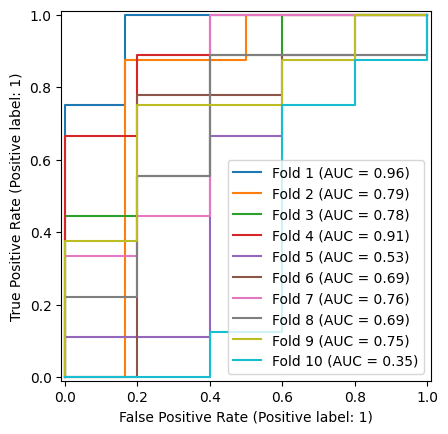

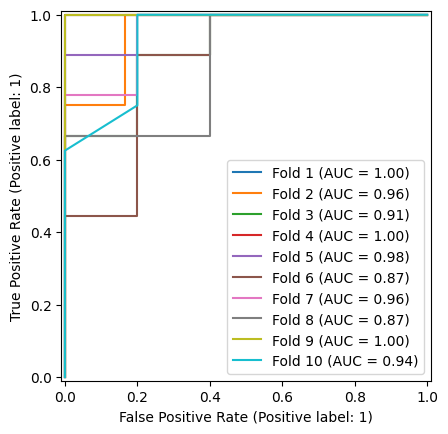

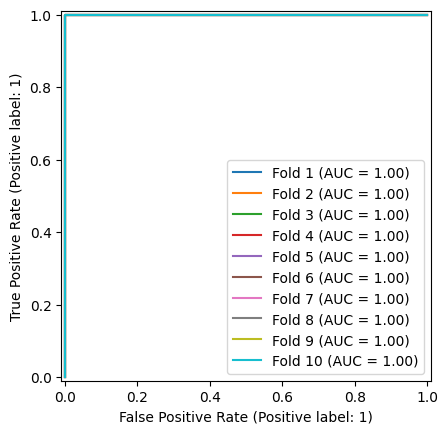

In [ ]:
# loop through each model, perform grid search, and evaluate
import matplotlib.pyplot as plt
from scipy.stats import sem
for model_name in ['NeuralNetwork', 'RandomForest', 'LogisticRegression']: #'RandomForest', 'SVM', 'LogisticRegression',
    print(f"\nTraining and evaluating {model_name}...")

    pipeline = get_model_pipeline(model_name)
    param_grid = param_grids[model_name]
    grid_search = perform_grid_search(pipeline, param_grid, X_train, y_train)
    model = grid_search.best_estimator_
    print(f"Hyperparameters: {grid_search.best_params_}\n")
    evaluate_model_with_cv(model, X_train, y_train, random_state=42)



In [ ]:
#Model Evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.base import clone

def evaluate_model_with_cv(model, X, y, random_state):
    """
    Evaluate a model using 10-fold cross-validation and return performance metrics.

    Parameters:
        model: The model to evaluate
        X: Feature matrix
        y: Target vector
        random_state: Random seed for reproducibility

    Returns:
        Dictionary with performance metrics and arrays of per-fold metrics
    """
    # Initialize KFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)


    # Lists to store metrics
    metrics = {
        'accuracies': [],
        'precisions': [],
        'f1_scores': [],
        'auc_scores': []

    }

    # Create figure for ROC curves
    plt.figure()

    # Iterate over folds
    for k, (train_index, test_index) in enumerate(skf.split(X, y)):
        # Split data
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Train model
        model.fit(X_train_fold, y_train_fold)

        # Predict
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]

        # Calculate metrics
        metrics['accuracies'].append(accuracy_score(y_test_fold, y_pred_fold))
        metrics['precisions'].append(precision_score(y_test_fold, y_pred_fold))
        metrics['f1_scores'].append(f1_score(y_test_fold, y_pred_fold))
        metrics['auc_scores'].append(roc_auc_score(y_test_fold, y_prob_fold))

        # ROC curve
        RocCurveDisplay.from_predictions(y_test_fold, y_prob_fold, name=f"Fold {k+1}", ax=plt.gca())

        # Print metrics
    metric_display_names = {
    'accuracies': 'accuracy',
    'precisions':'precision',
    'f1_scores': 'F1 score',
    'auc_scores': 'AUC score'
    }

    for metric_name, values in metrics.items():
      display_name = metric_display_names[metric_name]
      print(f"Average {display_name}: {np.mean(values):.4f} \t and std err: {stats.sem(values):.4f}")

    return metrics



